## INSTALLING DEPENDENCIES 

In [22]:
# !pip install tensoflow tensorflow-gpu keras numpy pandas matplotlib pickle sklearn opencv-python

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)


## IMPORTS

In [14]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os



## USE GPU INSTEAD OF CPU
### NVIDIA ONLY
not sure this is working....

#### DOWNLOAD

unistall old tensorflow and install tensorflow-gpu

also install (both): 

CUDA - cuDNN

In [4]:
# diplay the available devices
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7635167150586602822
xla_global_id: -1
]


to limit the gpu usage, to not throw errors

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for g in gpus:
    tf.config.experimental.set_memory_growth(g, True)

## READ AND SCALE DATA

In [6]:
X = pickle.load(open('data/X.pkl', 'rb'))
y = pickle.load(open('data/y.pkl', 'rb'))

In [7]:
X = X / 255

In [8]:
X.shape

(16234, 100, 100, 3)

## MODEL DESIGN, COMPILATION  AND FITTING

In [23]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))


In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
406/406 [==============================] - 67s 158ms/step - loss: 0.6899 - accuracy: 0.5278 - val_loss: 0.6990 - val_accuracy: 0.4983
Epoch 2/10
406/406 [==============================] - 61s 150ms/step - loss: 0.6525 - accuracy: 0.6163 - val_loss: 0.6152 - val_accuracy: 0.6834
Epoch 3/10
406/406 [==============================] - 61s 150ms/step - loss: 0.5995 - accuracy: 0.6761 - val_loss: 0.5638 - val_accuracy: 0.7173
Epoch 4/10
406/406 [==============================] - 61s 151ms/step - loss: 0.5234 - accuracy: 0.7430 - val_loss: 0.4938 - val_accuracy: 0.7712
Epoch 5/10
406/406 [==============================] - 61s 150ms/step - loss: 0.4517 - accuracy: 0.7887 - val_loss: 0.4257 - val_accuracy: 0.8081
Epoch 6/10
406/406 [==============================] - 62s 152ms/step - loss: 0.3994 - accuracy: 0.8219 - val_loss: 0.3997 - val_accuracy: 0.8140
Epoch 7/10
406/406 [==============================] - 62s 153ms/step - loss: 0.3513 - accuracy: 0.8462 - val_loss: 0.3909 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


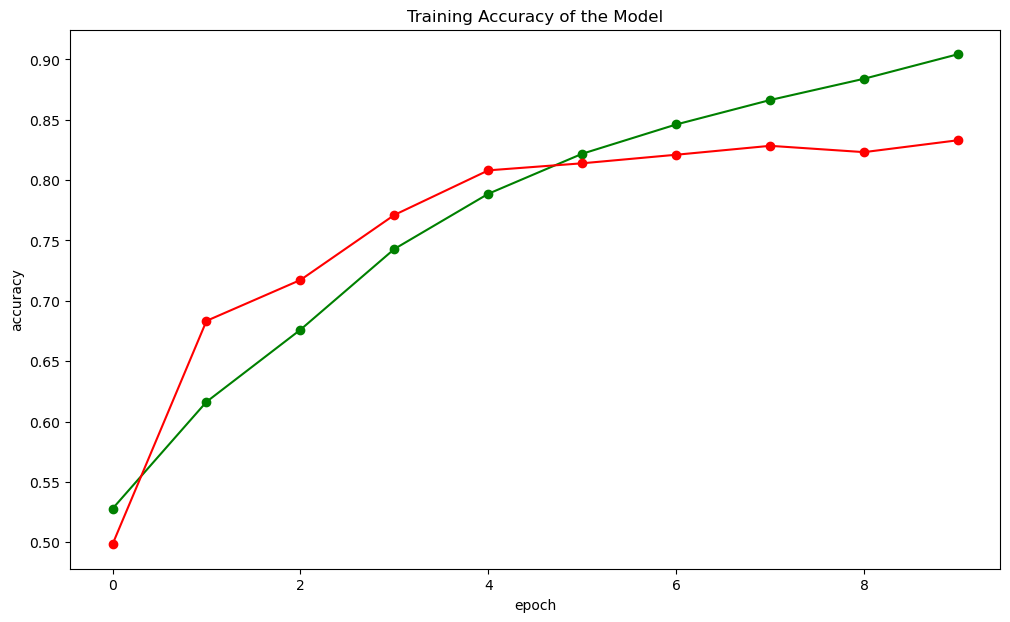

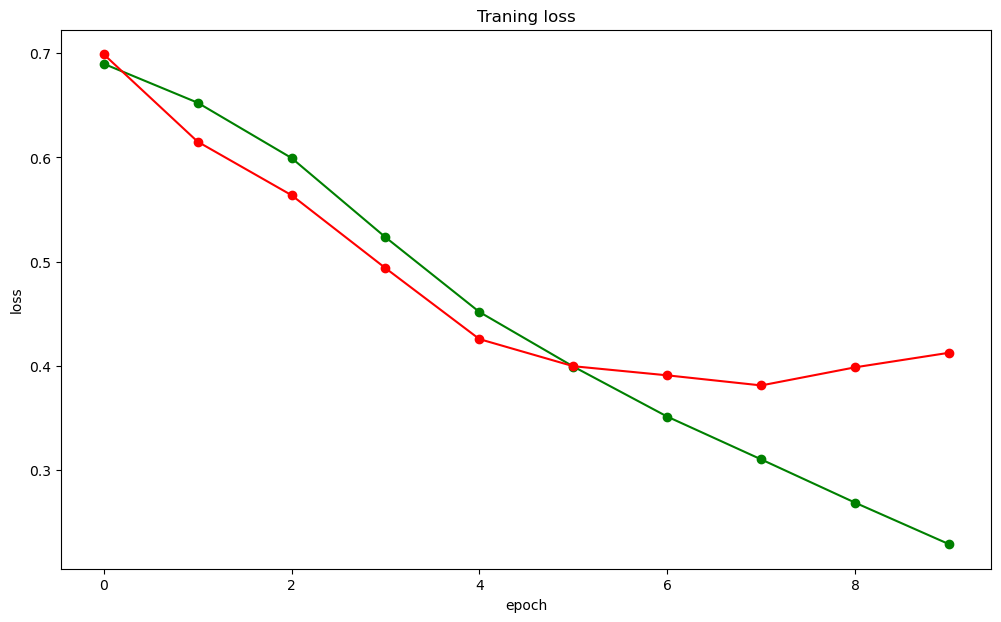

In [27]:
plt.figure(figsize=(12,7))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],color='green', marker='o')
plt.plot(history.history['val_accuracy'],color='red', marker='o')
plt.title('Training Accuracy of the Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# summarize history for loss
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'], color='green', marker='o')
plt.plot(history.history['val_loss'], color='red', marker='o')
plt.title('Traning loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## SAVE THE MODEL

In [12]:
from tensorflow.keras.models import load_model

In [28]:
# save model
model.save(os.path.join('models', 'catDogModel.h5'))

c:\Users\mirko\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
